In [1]:
# Magic functions
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import libraries
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
# Create a dictionary of folders and url files
folder_dict = {
    'mtp':'mtp.txt',
    'gd':'gd.txt',
}

In [4]:
# Create folders and download images
for folder, file in folder_dict.items():
    path = Path('data/train/')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)

In [5]:
# Verify and delete if a downloaded image is not in valid format
classes = list(folder_dict.keys())

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

mtp


gd


In [6]:
# Create a DataBunch
np.random.seed(45)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=64, num_workers=4).normalize(imagenet_stats)

In [7]:
len(data.train_ds), len(data.valid_ds)

(252, 63)

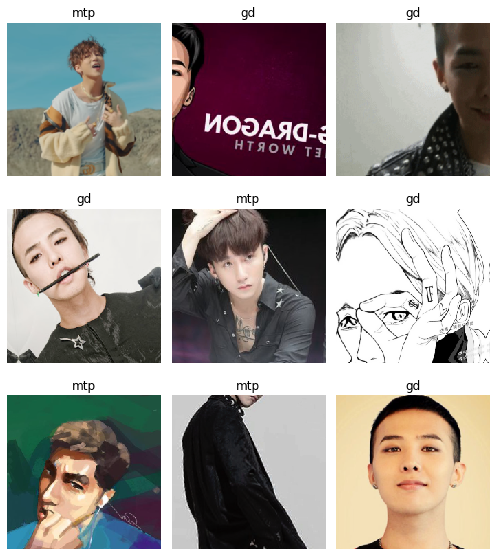

In [8]:
# Have a look at some random images
data.show_batch(rows=3, figsize=(7,8)) 

In [9]:
# Create a model using pre-trained resnet34
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

# Train the model with 4 epoches
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.179098,2.954998,0.380952,00:23
1,0.966399,1.274733,0.634921,00:20
2,0.835831,0.878655,0.777778,00:20
3,0.811833,0.772060,0.809524,00:20


In [10]:
# Save the weights
learn.save('stage-1') 

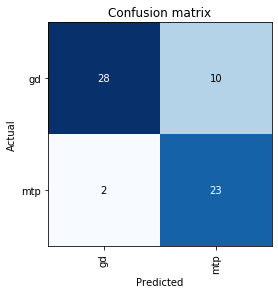

In [11]:
# Plot results
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [12]:
# Export the model
learn.export()